# Individual Task #1: Regression
### [Gemstone Price Prediction]: https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
def load_datasets(df):
    
    X, y = df[["carat","cut","color","clarity","depth","table","x","y","z"]], df["price"]    
    return X, y

In [3]:
def load_full(filename):
    data = pd.read_csv(filename)
    return data

In [4]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [5]:
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_new = (X - mean) / std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def histograms(data, cols,target_column):
    cols.append(target_column)

    fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(12, 30))
    axs = np.ravel(axs)

    for i, col in enumerate(cols):
        plt.sca(axs[i])
        sns.histplot(data, x=col, 
                     kde=True, fill=True, 
                     line_kws={'lw':2,'ls':'--','color':'k'}, 
                     color='blue')
        plt.title(f"{col} distribution plot", fontdict={'size':16,'color':'k'})
    
    plt.tight_layout()
    plt.show()

In [8]:
def convertStr2Int(dataset):
    
    # cut color clarity
    le = LabelEncoder()
    le.fit(dataset.cut.drop_duplicates())
    dataset.cut = le.transform(dataset.cut)
    
    le.fit(dataset.color.drop_duplicates()) 
    dataset.color = le.transform(dataset.color)
    
    le.fit(dataset.clarity.drop_duplicates()) 
    dataset.clarity = le.transform(dataset.clarity)
    
    return dataset

In [9]:
def correlation(data):
    f, ax = plt.subplots(figsize=(16,8))
    sns.heatmap(data.corr(), annot=True, fmt='.2f', ax=ax)
    plt.show()


In [10]:
def pairpl(data):
    pairplot_columns=['carat','clarity','depth','table','x','y','z']
    sns.pairplot(data[pairplot_columns])
    plt.show();

In [11]:
def hypothesis(X, theta):
    h_theta = np.dot(X, theta)
    return h_theta

In [12]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = np.sum((hypothesis(X, theta) - y)**2)/(2*m)
    return J

In [13]:
def derivative(X, y, theta):
    m = X.shape[0]

    d_thetha=(1/m)*(np.dot(hypothesis(X,theta)-y,X))
    return d_thetha

In [14]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):

    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):

        delta=alpha*derivative(X,y,theta)
        theta = theta - delta

        J=cost_function(X, y, theta)

        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [15]:
def sklearnAlgorithm(X_train, X_test, y_train, y_test):

    
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)

    

    rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
    res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
    print(res)
    d = y_test - y_test_pred
    MSE = metrics.mean_squared_error(y_test, y_test_pred)
    MAE = metrics.mean_absolute_error(y_test, y_test_pred)
    RMSE = np.sqrt(MSE)

    
    return MSE, MAE, RMSE

In [16]:
data = load_full('cubic_zirconia.csv')
data.drop('id', inplace=True, axis=1)
data.count()

carat      26967
cut        26967
color      26967
clarity    26967
depth      26270
table      26967
x          26967
y          26967
z          26967
price      26967
dtype: int64

In [17]:
data.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [18]:
print("The null-values statiscics:")
data.isnull().sum()

The null-values statiscics:


carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [19]:
data=data.dropna(axis=0)
data.count()

carat      26270
cut        26270
color      26270
clarity    26270
depth      26270
table      26270
x          26270
y          26270
z          26270
price      26270
dtype: int64

In [20]:
print("The null-values statiscics:")
data.isnull().sum()

The null-values statiscics:


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [21]:
data['price'].unique()

array([ 499,  984, 6289, ..., 8771, 3649, 6751], dtype=int64)

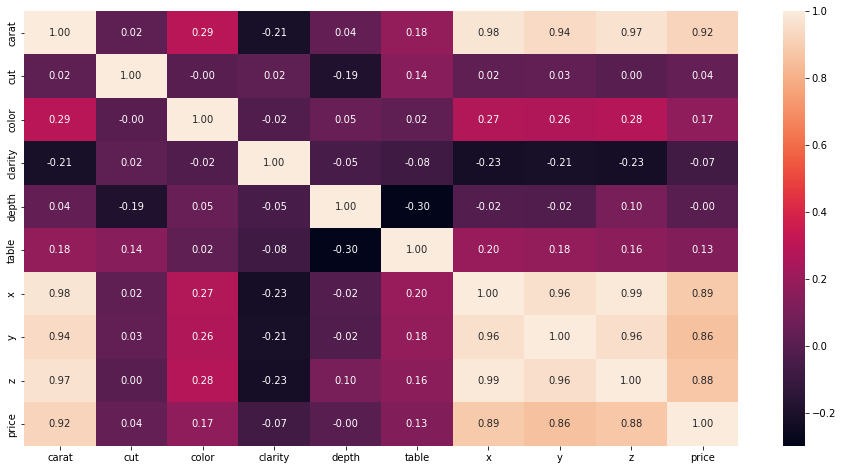

In [22]:
data = convertStr2Int(data)
correlation(data)


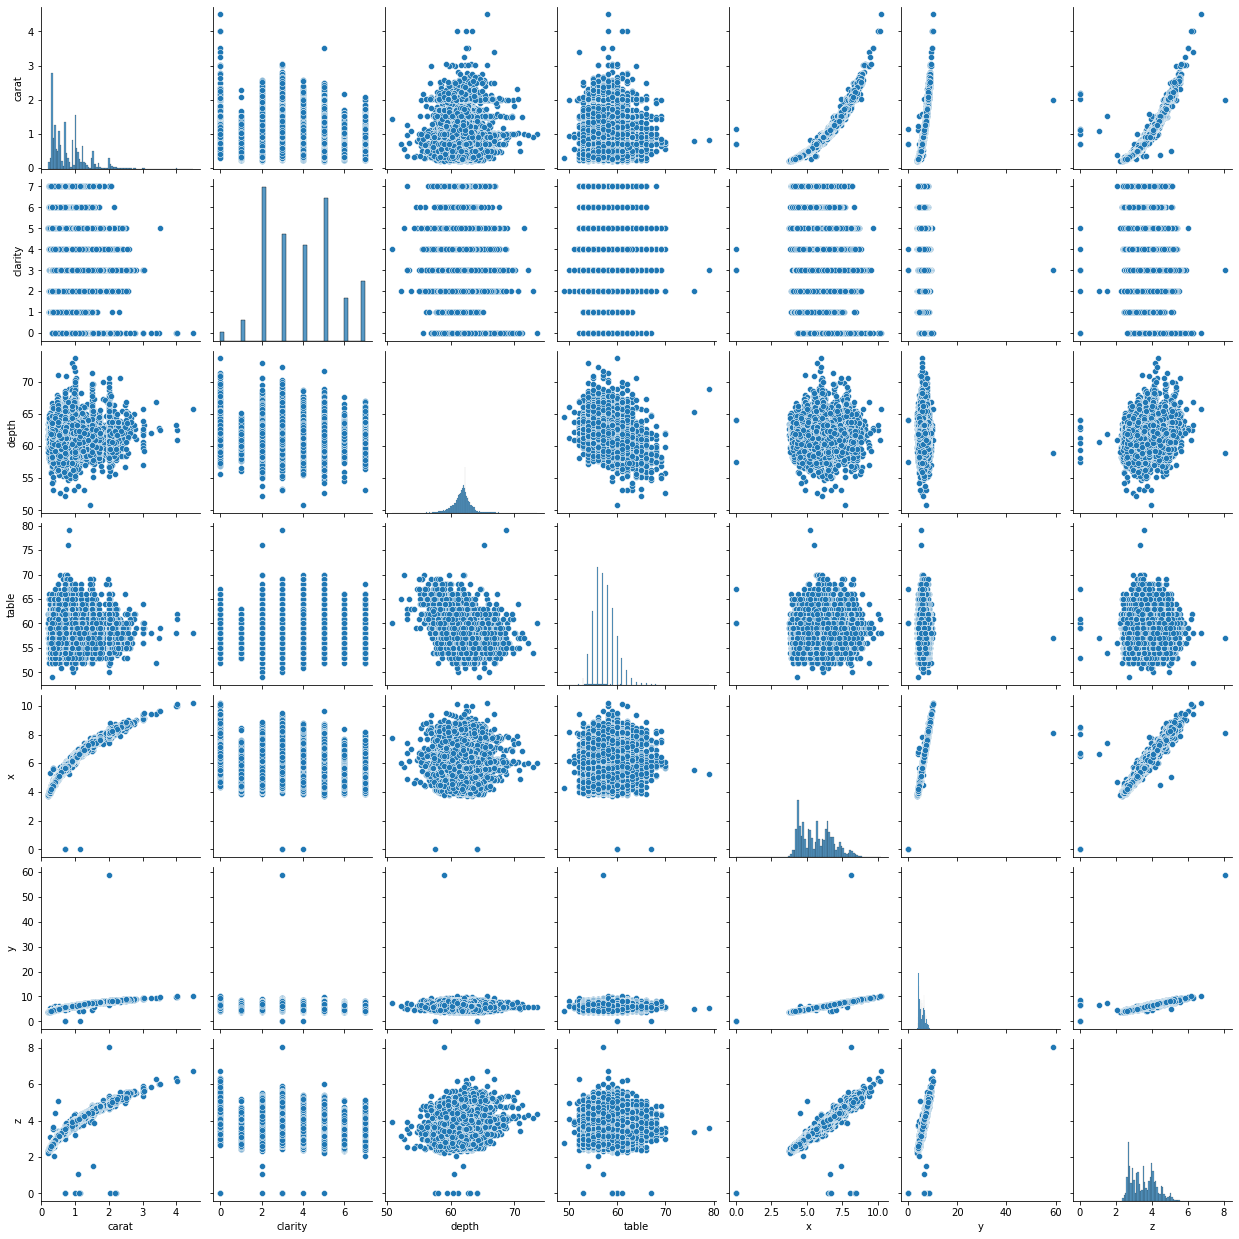

In [23]:
pairpl(data)

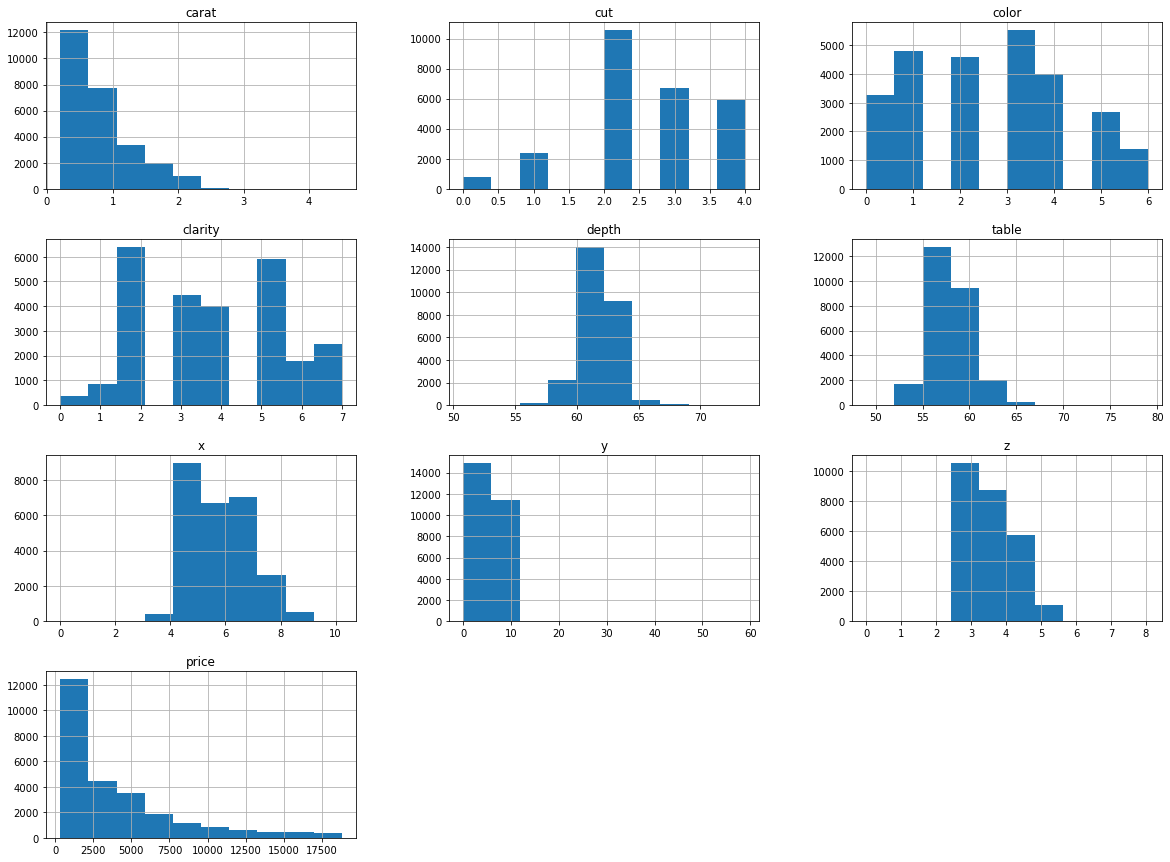

In [24]:
data.hist(figsize=(20,15))
plt.show()

In [25]:
data=convertStr2Int(data)
X, y = load_datasets(data)
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(26270, 9), y=(26270,)


In [26]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(21016, 9), y=(21016,)
Test set: X=(5254, 9), y=(5254,)


In [27]:
skl_MSE, skl_MAE, skl_RMSE = sklearnAlgorithm(X_train, X_test, y_train, y_test)

       y_actual        y_pred         err
940        4291   5038.947374   17.430608
20235       872    753.834411   13.551100
26685       906   1165.762168   28.671321
25159      4372   4590.150782    4.989725
18761      8457  11415.759644   34.985925
...         ...           ...         ...
15119      2990   4166.507873   39.348089
21254      4560   5825.497385   27.752136
13653       801   1105.487216   38.013385
13049      6912   6430.008597    6.973255
9301       1385   2801.713930  102.289814

[5254 rows x 3 columns]


In [28]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.zeros(10)

In [29]:
y = y_train[:]

In [30]:
print(cost_function(X, y, theta))

15989111.392010849


In [31]:
alpha = 0.1
num_iters = 5000

In [32]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta: {}'.format(new_theta))

Theta: [3957.73767606 5192.19022775   61.36898529 -464.66470567  512.83387469
 -180.220641   -223.74221945 -913.66423818   52.48027492 -347.40595758]


In [33]:
X_test, mean, std = normalize(X_test)
X_test_proc = prepare_X(X_test)
y_test_pred = hypothesis(X_test_proc, new_theta)


MSE = metrics.mean_squared_error(y_test, y_test_pred)
MAE = metrics.mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print('MSE  = ', MSE)
print('MAE  = ', MAE)
print('RMSE = ', RMSE)

print(cost_function(X_test_proc, y_test, new_theta))

       y_actual        y_pred         err
940        4291   5226.735076   21.806923
20235       872    713.130061   18.219030
26685       906   1138.652347   25.679067
25159      4372   4787.366891    9.500615
18761      8457  11880.146239   40.477075
...         ...           ...         ...
15119      2990   4290.652908   43.500097
21254      4560   6019.914759   32.015675
13653       801   1064.791344   32.932752
13049      6912   6623.533922    4.173410
9301       1385   2851.449641  105.880840

[5254 rows x 3 columns]
MSE  =  1652752.31907919
MAE  =  864.4588473912656
RMSE =  1285.5941502197302
826376.159539595


In [34]:
print('sklearn algorithm result:')
print('MSE  = ', skl_MSE)
print('MAE  = ', skl_MAE)
print('RMSE = ', skl_RMSE)

sklearn algorithm result:
MSE  =  1646581.8124880975
MAE  =  840.5276999048936
RMSE =  1283.1920403774711


In [35]:
print("The difference between my algorithm's errors and slkearn's errors:")
print('MSE:  ', (MSE-skl_MSE))
print('MAE:  ', (MAE-skl_MAE))
print('RMSE: ', (RMSE-skl_RMSE))

The difference between my algorithm's errors and slkearn's errors:
MSE:   6170.506591092562
MAE:   23.931147486372083
RMSE:  2.402109842259051


In [36]:
pMSE=(2000000*100)/MSE
pSklMSE=(2000000*100)/skl_MSE
print(pSklMSE-pMSE)

0.4534816591730788


In [37]:
pMAE=(900*100)/MAE
pSKLMAE=(900*100)/skl_MAE
print(pSKLMAE-pMAE)

2.964214851758072


In [38]:
pRMSE=(1400*100)/RMSE
pSKLRMSE=(1400*100)/skl_RMSE
print(pSKLRMSE-pRMSE)

0.20385687089958537
